# Students.csv

Referência principal:
- https://archive.ics.uci.edu/ml/datasets/Student+Performance+on+an+entrance+examination#

## Pré-processamento

Vamos partir do arquivo .arff. Para carregá-lo, vamos usar o módulo arff da lib scipy.io (ref: https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419/2).

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff

data = arff.loadarff('CEE_DATA.arff')

De acordo com a documentação do Scipy, os dados são retornados como um array, que pode ser acessado como um dicionário de arrays NumPy. Mais detalhes constam em https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html.

Na prática, `data` é uma tupla contendo os dados em si, na forma de um array numpy, e os metadados em classe específica do scipy.

In [2]:
type(data), type(data[0]), type(data[1])

(tuple, numpy.ndarray, scipy.io.arff.arffread.MetaData)

Para salvar os valores em um dataframe, vamos instanciar um objeto dataframe passando os dados, `data[0]`.

In [3]:
df = pd.DataFrame(data[0])

df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,b'Excellent',b'male',b'General',b'NO',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Excellent',b'Excellent',b'DOCTOR',b'OTHERS'
1,b'Excellent',b'male',b'OBC',b'WA',b'TWO',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'HOUSE_WIFE'
2,b'Excellent',b'male',b'OBC',b'OA',b'TWO',b'OTHERS',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'BUSINESS',b'HOUSE_WIFE'
3,b'Excellent',b'male',b'General',b'WA',b'ONE',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'SCHOOL_TEACHER'
4,b'Excellent',b'male',b'General',b'OA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'COLLEGE_TEACHER',b'HOUSE_WIFE'


A primeira coisa que vamos fazer é verificar os nomes das colunas, para ver se está tudo certinho.

In [4]:
df.columns.values

array(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'], dtype=object)

A coluna 'Class_ X_Percentage' tem um espaço que pode ser meio problemático. Para renomear uma coluna, usamos a função `rename` - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html.

In [5]:
df = df.rename(columns={"Class_ X_Percentage": "Class_X_Percentage"})

In [6]:
df.columns.values

array(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'], dtype=object)

Outro ponto de destaque são os valores dos dados. Todos vieram em binário. Isso não necessariamente é um problema - na realidade, é uma necessidade para usos em ferramentas específicas, como a Weka Tool, https://www.cs.waikato.ac.nz/ml/weka/.

Para nossas aplicações aqui, talvez seja mais fácil ter uma cópia do dataframe com os valores devidamente decodificados. `df` será nosso dataframe principal, enquanto `df_bin` será o dataframe em binário.

In [7]:
df_bin = df
df_bin

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,b'Excellent',b'male',b'General',b'NO',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Excellent',b'Excellent',b'DOCTOR',b'OTHERS'
1,b'Excellent',b'male',b'OBC',b'WA',b'TWO',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'HOUSE_WIFE'
2,b'Excellent',b'male',b'OBC',b'OA',b'TWO',b'OTHERS',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'BUSINESS',b'HOUSE_WIFE'
3,b'Excellent',b'male',b'General',b'WA',b'ONE',b'SEBA',b'AHSEC',b'OTHERS',b'Excellent',b'Excellent',b'SCHOOL_TEACHER',b'SCHOOL_TEACHER'
4,b'Excellent',b'male',b'General',b'OA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Excellent',b'Excellent',b'COLLEGE_TEACHER',b'HOUSE_WIFE'
...,...,...,...,...,...,...,...,...,...,...,...,...
661,b'Average',b'female',b'ST',b'WA',b'ONE',b'SEBA',b'AHSEC',b'ENGLISH',b'Good',b'Vg',b'OTHERS',b'HOUSE_WIFE'
662,b'Average',b'male',b'ST',b'WA',b'THREE',b'SEBA',b'AHSEC',b'ENGLISH',b'Vg',b'Good',b'CULTIVATOR',b'HOUSE_WIFE'
663,b'Average',b'male',b'ST',b'WA',b'TWO',b'SEBA',b'CBSE',b'ENGLISH',b'Good',b'Vg',b'OTHERS',b'SCHOOL_TEACHER'
664,b'Average',b'male',b'ST',b'WA',b'THREE',b'SEBA',b'AHSEC',b'ENGLISH',b'Good',b'Good',b'SCHOOL_TEACHER',b'HOUSE_WIFE'


Para transformar os valores em binário, vamos iterar nas colunas do dataframe com uma lambda function, aplicando um decode para utf-8.

In [8]:
"""
df['Performance'] = df.Performance.apply(lambda x: x.decode('utf-8'))
df['Gender'] = df.Gender.apply(lambda x: x.decode('utf-8'))
df['Caste'] = df.Caste.apply(lambda x: x.decode('utf-8'))
df['coaching'] = df.coaching.apply(lambda x: x.decode('utf-8'))
df['time'] = df.time.apply(lambda x: x.decode('utf-8'))
df['Class_ten_education'] = df.Class_ten_education.apply(lambda x: x.decode('utf-8'))
df['twelve_education'] = df.twelve_education.apply(lambda x: x.decode('utf-8'))
df['medium'] = df.medium.apply(lambda x: x.decode('utf-8'))
df['Class_X_Percentage'] = df.Class_X_Percentage.apply(lambda x: x.decode('utf-8'))
df['Class_XII_Percentage'] = df.Class_XII_Percentage.apply(lambda x: x.decode('utf-8'))
df['Father_occupation'] = df.Father_occupation.apply(lambda x: x.decode('utf-8'))
df['Mother_occupation'] = df.Mother_occupation.apply(lambda x: x.decode('utf-8'))
"""

# esse blocão acima é equivalente à linha abaixo. queria ter descoberto isso antes XD
df = df.apply(lambda x: x.str.decode('utf-8'))
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER
664,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


Bem mais limpo! Os metadados do dataset dizem que os valores das colunas são todos nominais:

In [9]:
data[1]

Dataset: CEEData
	Performance's type is nominal, range is ('Excellent', 'Vg', 'Good', 'Average')
	Gender's type is nominal, range is ('male', 'female')
	Caste's type is nominal, range is ('General', 'OBC', 'SC', 'ST')
	coaching's type is nominal, range is ('NO', 'WA', 'OA')
	time's type is nominal, range is ('ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SEVEN')
	Class_ten_education's type is nominal, range is ('SEBA', 'OTHERS', 'CBSE')
	twelve_education's type is nominal, range is ('AHSEC', 'CBSE', 'OTHERS')
	medium's type is nominal, range is ('ENGLISH', 'OTHERS', 'ASSAMESE')
	Class_ X_Percentage's type is nominal, range is ('Excellent', 'Vg', 'Good', 'Average')
	Class_XII_Percentage's type is nominal, range is ('Excellent', 'Vg', 'Good', 'Average')
	Father_occupation's type is nominal, range is ('DOCTOR', 'SCHOOL_TEACHER', 'BUSINESS', 'COLLEGE_TEACHER', 'OTHERS', 'BANK_OFFICIAL', 'ENGINEER', 'CULTIVATOR')
	Mother_occupation's type is nominal, range is ('OTHERS', 'HOUSE_WIFE', 'SCHOOL_TEACH

Dito isso, acredito que seja suficiente mapear esses valores nominais para instâncias numéricas. Isso será feito com um dict para cada coluna.

In [10]:
df.columns.values

array(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'], dtype=object)

In [11]:
# Performance
performance_labels = df.Performance.unique().tolist()
perfomance_label_dict = {}
for index, possible_label in enumerate(performance_labels):
    perfomance_label_dict[possible_label] = index

# Gender
gender_labels = df.Gender.unique().tolist()
gender_label_dict = {}
for index, possible_label in enumerate(gender_labels):
    gender_label_dict[possible_label] = index

# Caste
caste_labels = df.Caste.unique().tolist()
caste_label_dict = {}
for index, possible_label in enumerate(caste_labels):
    caste_label_dict[possible_label] = index

# coaching
coaching_labels = df.coaching.unique().tolist()
coaching_label_dict = {}
for index, possible_label in enumerate(coaching_labels):
    coaching_label_dict[possible_label] = index

# time
time_labels = df.time.unique().tolist()
time_label_dict = {}
for index, possible_label in enumerate(time_labels):
    time_label_dict[possible_label] = index

# Class_ten_education
class_ten_edu_labels = df.Class_ten_education.unique().tolist()
class_ten_edu_label_dict = {}
for index, possible_label in enumerate(class_ten_edu_labels):
    class_ten_edu_label_dict[possible_label] = index

# twelve_education
twelve_edu_labels = df.twelve_education.unique().tolist()
twelve_edu_label_dict = {}
for index, possible_label in enumerate(twelve_edu_labels):
    twelve_edu_label_dict[possible_label] = index
    
# medium
medium_labels = df.medium.unique().tolist()
medium_label_dict = {}
for index, possible_label in enumerate(medium_labels):
    medium_label_dict[possible_label] = index

# Class_X_Percentage
class_x_perc_labels = df.Class_X_Percentage.unique().tolist()
class_x_perc_label_dict = {}
for index, possible_label in enumerate(class_x_perc_labels):
    class_x_perc_label_dict[possible_label] = index

# Class_XII_Percentage
class_xii_perc_labels = df.Class_XII_Percentage.unique().tolist()
class_xii_perc_label_dict = {}
for index, possible_label in enumerate(class_xii_perc_labels):
    class_xii_perc_label_dict[possible_label] = index

# Father_occupation
father_oc_labels = df.Father_occupation.unique().tolist()
father_oc_label_dict = {}
for index, possible_label in enumerate(father_oc_labels):
    father_oc_label_dict[possible_label] = index

# Mother_occupation
mother_oc_labels = df.Mother_occupation.unique().tolist()
mother_oc_label_dict = {}
for index, possible_label in enumerate(mother_oc_labels):
    mother_oc_label_dict[possible_label] = index

Com todos os dicts em mãos, basta fazer o replace deles nas colunas do dataframe referência. Vamos chamá-lo de `df_num`.

In [12]:
df_num = df

In [13]:
df_num['Performance'] = df.Performance.replace(perfomance_label_dict)
df_num['Gender'] = df.Gender.replace(gender_label_dict)
df_num['Caste'] = df.Caste.replace(caste_label_dict)
df_num['coaching'] = df.coaching.replace(coaching_label_dict)
df_num['time'] = df.time.replace(time_label_dict)
df_num['Class_ten_education'] = df.Class_ten_education.replace(class_ten_edu_label_dict)
df_num['twelve_education'] = df.twelve_education.replace(twelve_edu_label_dict)
df_num['medium'] = df.medium.replace(medium_label_dict)
df_num['Class_X_Percentage'] = df.Class_X_Percentage.replace(class_x_perc_label_dict)
df_num['Class_XII_Percentage'] = df.Class_XII_Percentage.replace(class_xii_perc_label_dict)
df_num['Father_occupation'] = df.Father_occupation.replace(father_oc_label_dict)
df_num['Mother_occupation'] = df.Mother_occupation.replace(mother_oc_label_dict)
df_num

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,1,0,0,1,1
2,0,0,1,2,1,1,1,0,0,0,2,1
3,0,0,0,1,0,0,0,1,0,0,1,2
4,0,0,0,2,1,0,1,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
661,3,1,3,1,0,0,0,0,2,1,4,1
662,3,0,3,1,2,0,0,0,1,2,7,1
663,3,0,3,1,1,0,1,0,2,1,4,2
664,3,0,3,1,2,0,0,0,2,2,1,1


## Parte prática da aula - 12/03/21

Vamos usar a coluna `Performance` como atributo de classe.

In [14]:
label = df['Performance']
label

0      0
1      0
2      0
3      0
4      0
      ..
661    3
662    3
663    3
664    3
665    3
Name: Performance, Length: 666, dtype: int64

In [15]:
df_aula = df.drop(['Performance'], axis=1)
df_aula

,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1,0,0,1,1
2,0,1,2,1,1,1,0,0,0,2,1
3,0,0,1,0,0,0,1,0,0,1,2
4,0,0,2,1,0,1,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
661,1,3,1,0,0,0,0,2,1,4,1
662,0,3,1,2,0,0,0,1,2,7,1
663,0,3,1,1,0,1,0,2,1,4,2
664,0,3,1,2,0,0,0,2,2,1,1


In [16]:
X = df_aula.values
y = label.values

X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 1, 1],
        [0, 1, 2, ..., 0, 2, 1],
        ...,
        [0, 3, 1, ..., 1, 4, 2],
        [0, 3, 1, ..., 2, 1, 1],
        [1, 3, 0, ..., 2, 2, 0]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### SVM

In [18]:
from sklearn.metrics import classification_report

In [19]:
from sklearn.svm import SVC

#clf_svm = SVC(kernel='rbf', gamma='scale', C=0.5)
clf_svm = SVC()

clf_svm.fit(X_train, y_train)

preds_svm = clf_svm.predict(X_test)

print(classification_report(y_test, preds_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.39      0.41      0.40        80
           2       0.37      0.59      0.45        75
           3       0.77      0.80      0.78        61

    accuracy                           0.47       267
   macro avg       0.38      0.45      0.41       267
weighted avg       0.40      0.47      0.43       267



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP

In [20]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(10,10), random_state=1, max_iter=10000)
clf_mlp.fit(X_train, y_train)

preds_mlp = clf_mlp.predict(X_test)

print(classification_report(y_test, preds_mlp))

              precision    recall  f1-score   support

           0       0.32      0.16      0.21        51
           1       0.42      0.44      0.43        80
           2       0.34      0.43      0.38        75
           3       0.69      0.74      0.71        61

    accuracy                           0.45       267
   macro avg       0.44      0.44      0.43       267
weighted avg       0.44      0.45      0.44       267



## Usando Pycaret para testar modelos

Uma forma de verificar performances de diferentes modelos diferentes de maneira bem eficiente é usar a lib `pycaret`, https://pycaret.org/. Rodei esse notebook no colab, então precisamos instalá-lo na sessão.

In [21]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


A biblioteca tem várias funcionalidades interessantes. Aqui, vamos focar no que faz mais sentido para o nosso problema: o módulo de classificação, https://pycaret.readthedocs.io/en/latest/api/classification.html. Precisamos criar um objeto `setup` que receberá os dados. 
- `data`: passamos o dataframe em si, sendo que não é necessário se preocupar em retirar a coluna de classe. Atributo obrigatório;
- `target`: indica a coluna de classe XD. Atributo obrigatório;
- `session_id`: é um random state. Atributo opcional;
- `log_experiment`: usamos para salvar um log para comparar resultados no final. Atributo opcional;
- `numeric_features`: os únicos atributos obrigatórios do objeto são `data` e `target`. Passando esses dois, a lib infere algumas informações, incluindo os tipos de atributo de cada coluna, mas podemos indicar manualmente sem problemas;

Por padrão, o split é estratificado e sua razão em treino e teste é de 70%.

In [22]:
from pycaret.classification import *
exp_cls101 = setup(data = df, target = 'Performance', session_id=123, log_experiment=True,
                   numeric_features = ['Gender', 'Caste', 'coaching', 'time',
                                       'Class_ten_education', 'twelve_education', 'medium',
                                       'Class_X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
                                       'Mother_occupation'])

,Description,Value
0,session_id,123
1,Target,Performance
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
4,Original Data,"(666, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Para comparar modelos de diferentes classificadores, usamos a função `compare_models`, https://pycaret.org/compare-models/.

In [23]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5408,0.7718,0.5046,0.5160,0.5203,0.3618,0.3676,0.019
lr,Logistic Regression,0.5301,0.7704,0.4949,0.5166,0.5123,0.3474,0.3522,0.312
gbc,Gradient Boosting Classifier,0.5236,0.7492,0.4854,0.5029,0.5043,0.3391,0.3448,0.355
rf,Random Forest Classifier,0.5173,0.7518,0.4850,0.5057,0.5056,0.3335,0.3371,0.503
nb,Naive Bayes,0.5172,0.7533,0.4907,0.5130,0.5031,0.3313,0.3356,0.018
ridge,Ridge Classifier,0.5130,0.0000,0.4687,0.4851,0.4777,0.3193,0.3279,0.015
lightgbm,Light Gradient Boosting Machine,0.4999,0.7590,0.4698,0.4963,0.4918,0.3109,0.3141,0.103
qda,Quadratic Discriminant Analysis,0.4915,0.7521,0.4586,0.4829,0.4752,0.2933,0.2999,0.019
et,Extra Trees Classifier,0.4786,0.7166,0.4576,0.4701,0.4693,0.2839,0.2862,0.469
knn,K Neighbors Classifier,0.4699,0.7062,0.4557,0.4817,0.4672,0.2780,0.2821,0.121


Parece que o classificador `Linear Discriminant Analysis` foi o que se saiu melhor nesse primeiro teste. Sua referência na documentação do sklearn está disponível [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html). Um copy/paste do que é o modelo segue abaixo:
- A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
- The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

---

Vamos criar um modelo específico e ver como ele se comporta em alguns folds. Para tanto, usamos a função `create_model`, https://pycaret.org/create-model/.

In [24]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5532,0.8034,0.5120,0.5347,0.5427,0.3866,0.3873
1,0.3830,0.7070,0.3575,0.3878,0.3758,0.1401,0.1426
2,0.5957,0.7692,0.5288,0.5421,0.5632,0.4323,0.4434
3,0.6170,0.7903,0.6275,0.6260,0.6074,0.4752,0.4797
4,0.5532,0.7638,0.5310,0.5441,0.5429,0.3854,0.3872
5,0.5319,0.7656,0.5092,0.5214,0.5241,0.3566,0.3577
6,0.6739,0.8255,0.6013,0.6749,0.6534,0.5397,0.5534
7,0.5435,0.7551,0.5152,0.5121,0.5239,0.3711,0.3728
8,0.4565,0.7508,0.4122,0.3909,0.4110,0.2292,0.2440
9,0.5000,0.7873,0.4507,0.4255,0.4587,0.3021,0.3079


Vamos ver se ele pode fazer melhor tunando alguns parâmetros. Para tanto, podemos usar a função `tune_model`, https://pycaret.org/tune-model/, passando o modelo criado como parâmetro.

In [25]:
lda_tuned = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5532,0.8016,0.5120,0.5377,0.5435,0.3858,0.3870
1,0.4043,0.7058,0.3742,0.3943,0.3908,0.1718,0.1757
2,0.5957,0.7687,0.5288,0.5421,0.5632,0.4323,0.4434
3,0.6170,0.7916,0.6275,0.6260,0.6074,0.4752,0.4797
4,0.5319,0.7634,0.4953,0.5100,0.5134,0.3538,0.3565
5,0.5319,0.7661,0.5092,0.5214,0.5241,0.3566,0.3577
6,0.6739,0.8248,0.6013,0.6749,0.6534,0.5397,0.5534
7,0.5435,0.7572,0.5152,0.5121,0.5239,0.3711,0.3728
8,0.4565,0.7502,0.4122,0.3909,0.4110,0.2292,0.2440
9,0.5000,0.7873,0.4507,0.4255,0.4587,0.3021,0.3079


Eis o vencedor da rodada:

In [26]:
lda_tuned

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

Outra coisa bem legal da lib `pycaret` são os diferentes plots que ela fornece. Vamos explorar alguns. O primeiro é o plot da **curva ROC** (receiver operating characteristic curve), usando a medida **AUC** (area under ther curve) de performance. Mais tecnicamente, a curva ROC plota os rates de verdadeiros-positivos e falsos-positivos em diferentes thresholds de classificação. Mais detalhes sobre o assunto podem ser encontrados nesses links aqui abaixo:
  - https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc,
  - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python, e 
  - https://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc

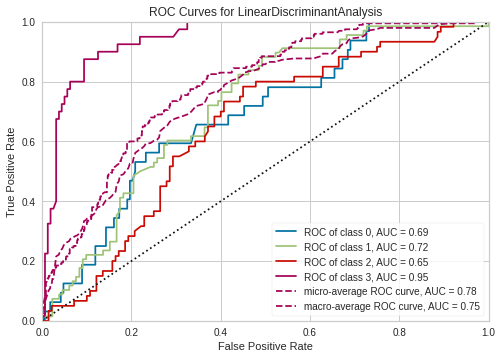

In [27]:
plot_model(lda_tuned)

Outros dois plots legais são a **matriz de confusão**, que conta e cruza os valores assinalados durante o processo de classificação, e o **report de classificação**, que dispõe os valores de precisão, recall e F1-score para as distintas classes. Lembrando que nossas classes foram codificadas para inteiros da seguinte maneira:

In [28]:
perfomance_label_dict

{'Average': 3, 'Excellent': 0, 'Good': 2, 'Vg': 1}

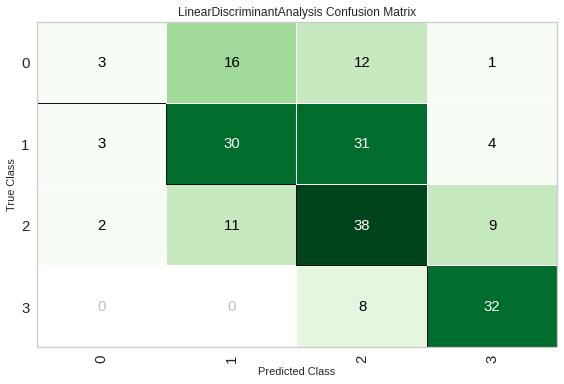

In [29]:
plot_model(lda_tuned, plot='confusion_matrix')

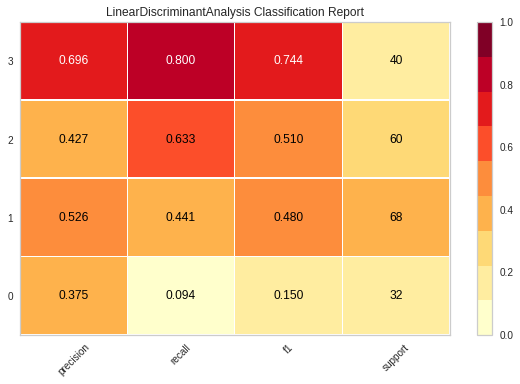

In [30]:
plot_model(lda_tuned, plot='class_report')

Outro plot interessante é o de **importância de features**, que mede, das várias colunas que passamos como dados de entrada, quais influem mais no resultado da classificação.

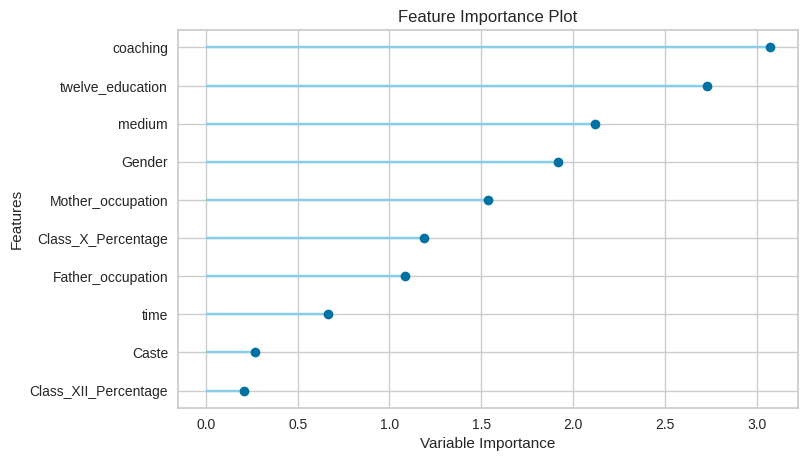

In [31]:
plot_model(lda_tuned, plot='feature')

A lib também permite combinar diferentes modelos criados. Segundo a documentação, a ideia é "combinar diferentes algoritmos de machine learning e usar o voto da maioria ou a média das probabilidades das predições para chegar na predição final". Basicamente, é uma abstração do [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) do sklearn. Mais detalhes constam em https://pycaret.org/blend-models/. Fora o LDA, os dois melhores colocados no primeiro teste foram o `logistic regression` ([log_reg_sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)), que usa máxima entropia para predizer os labels, e o `gradient boost classifier` ([gbc_sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)), onde "n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function".

In [32]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5319,0.8095,0.4928,0.5147,0.5214,0.3566,0.3577
1,0.4043,0.7198,0.3767,0.4109,0.3979,0.1697,0.1728
2,0.5745,0.7604,0.5261,0.5899,0.5604,0.4039,0.4145
3,0.5745,0.7995,0.5535,0.5731,0.5563,0.4118,0.4171
4,0.5532,0.7478,0.5310,0.5441,0.5429,0.3854,0.3872
5,0.5319,0.7682,0.5092,0.5226,0.5267,0.3605,0.3608
6,0.6522,0.8055,0.5846,0.6431,0.6319,0.5106,0.5183
7,0.5217,0.7584,0.4960,0.4922,0.4982,0.3368,0.3403
8,0.4348,0.7587,0.3930,0.3644,0.3890,0.2027,0.2129
9,0.5217,0.7764,0.4864,0.5111,0.4981,0.3360,0.3404


In [33]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5319,0.8011,0.4928,0.5248,0.5281,0.3594,0.3596
1,0.4681,0.6831,0.4200,0.4430,0.4340,0.2544,0.2667
2,0.5745,0.7505,0.5048,0.5112,0.5356,0.4028,0.4131
3,0.5957,0.8110,0.5866,0.5917,0.5799,0.4433,0.4487
4,0.4043,0.6976,0.3828,0.4096,0.4010,0.1775,0.1792
5,0.5745,0.7586,0.5503,0.5795,0.5627,0.4132,0.4172
6,0.4565,0.7054,0.4019,0.4317,0.4421,0.2399,0.2421
7,0.5652,0.7648,0.5145,0.5352,0.5468,0.3963,0.4010
8,0.5000,0.7026,0.4542,0.4203,0.4532,0.3003,0.3082
9,0.5652,0.8175,0.5465,0.5819,0.5594,0.4041,0.4126


No caso de modelos de classificação, o parâmetro `method` pode ter os valores _soft_ ou _hard_, onde soft usa as probabilidades das predições para escolher a predição final e hard usa os labels preditos. Aqui vamos de soft.

In [34]:
blend = blend_models(estimator_list=[lda, lr, gbc], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5532,0.8296,0.5120,0.5328,0.5398,0.3835,0.3853
1,0.4255,0.7037,0.3908,0.3995,0.4028,0.2019,0.2069
2,0.5532,0.7826,0.4929,0.5047,0.5229,0.3721,0.3833
3,0.5957,0.8044,0.5866,0.5987,0.5805,0.4426,0.4498
4,0.5319,0.7361,0.5118,0.5266,0.5230,0.3546,0.3566
5,0.6170,0.7846,0.6001,0.6142,0.6130,0.4742,0.4751
6,0.6087,0.7716,0.5462,0.6138,0.5883,0.4469,0.4616
7,0.5652,0.7674,0.5344,0.5398,0.5479,0.4026,0.4050
8,0.4348,0.7364,0.3930,0.3635,0.3908,0.2037,0.2120
9,0.5652,0.8178,0.5223,0.5546,0.5406,0.3939,0.4003


In [35]:
blend

VotingClassifier(estimators=[('lda',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                   

In [36]:
tune_blend = tune_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5319,0.8243,0.4953,0.5116,0.5189,0.3550,0.3563
1,0.4468,0.6990,0.4075,0.4201,0.4183,0.2276,0.2351
2,0.6170,0.7808,0.5481,0.5562,0.5816,0.4625,0.4740
3,0.5957,0.8047,0.5866,0.5987,0.5805,0.4426,0.4498
4,0.5319,0.7383,0.5144,0.5210,0.5248,0.3609,0.3616
5,0.6383,0.7847,0.6168,0.6342,0.6336,0.5034,0.5044
6,0.6304,0.7661,0.5654,0.6344,0.6123,0.4783,0.4905
7,0.5870,0.7682,0.5537,0.5586,0.5681,0.4325,0.4351
8,0.4348,0.7306,0.3930,0.3635,0.3908,0.2037,0.2120
9,0.5435,0.8257,0.5031,0.5315,0.5195,0.3645,0.3693


Como setamos o atributo `log_experiment` como True, podemos obter o log dos experimentos feitos. O resultado é salvo em um arquivo csv.

In [37]:
logs = get_logs(save=True)

In [38]:
log_csv = pd.read_csv('/content/clf-default-name_logs.csv')

O arquivo resultante é bem detalhado:

In [41]:
log_csv.columns.values

array(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.F1', 'metrics.Prec.', 'metrics.AUC',
       'metrics.MCC', 'metrics.TT', 'metrics.Recall', 'metrics.Accuracy',
       'metrics.Kappa', 'params.lr__tol', 'params.gbc__max_leaf_nodes',
       'params.gbc__min_samples_leaf', 'params.verbose',
       'params.gbc__max_features', 'params.lda__solver',
       'params.gbc__criterion', 'params.weights', 'params.lda',
       'params.gbc__verbose', 'params.gbc__min_samples_split',
       'params.lda__shrinkage', 'params.gbc__loss',
       'params.lr__intercept_scaling', 'params.gbc__init',
       'params.gbc__n_iter_no_change', 'params.flatten_transform',
       'params.gbc__validation_fraction', 'params.lr__warm_start',
       'params.gbc__random_state', 'params.lr__random_state',
       'params.gbc__tol', 'params.lda__priors', 'params.gbc__max_depth',
       'params.lr__max_iter', 'params.lr__penalty', 'params.lr__dual',
       'params.lr__n_jo

Como quero apenas fazer um sort simples dos melhores resultados, vou filtrar em outro dataframe apenas as colunas de métricas, nome do modelo e tempo de execução.

In [42]:
log_resumido = log_csv[['tags.Run Time', 'tags.mlflow.runName', 'metrics.F1',	'metrics.Prec.', 'metrics.AUC',	'metrics.MCC', 'metrics.TT', 'metrics.Recall', 'metrics.Accuracy', 'metrics.Kappa']]

In [43]:
log_resumido

,tags.Run Time,tags.mlflow.runName,metrics.F1,metrics.Prec.,metrics.AUC,metrics.MCC,metrics.TT,metrics.Recall,metrics.Accuracy,metrics.Kappa
0,46.34,Voting Classifier,0.534800,0.533000,0.772200,0.388800,0.540,0.518400,0.555700,0.383100
1,5.21,Voting Classifier,0.525000,0.524800,0.773400,0.373600,0.540,0.509000,0.545100,0.367600
2,4.24,Gradient Boosting Classifier,0.504271,0.502902,0.749211,0.344841,0.490,0.485437,0.523589,0.339125
3,0.72,Logistic Regression,0.512282,0.516614,0.770410,0.352191,0.040,0.494938,0.530065,0.347404
4,1.46,Linear Discriminant Analysis,0.518900,0.513500,0.771700,0.367800,0.010,0.502600,0.540800,0.361800
5,0.38,Linear Discriminant Analysis,0.520314,0.515959,0.771797,0.367597,0.010,0.504554,0.540796,0.361823
6,1.22,Ada Boost Classifier,0.431300,0.468000,0.672200,0.265300,0.103,0.453100,0.434000,0.254900
7,0.85,SVM - Linear Kernel,0.403300,0.435400,0.000000,0.252900,0.064,0.414900,0.446600,0.234700
8,0.38,Decision Tree Classifier,0.450900,0.462700,0.636600,0.255300,0.018,0.444000,0.450800,0.252700
9,1.43,K Neighbors Classifier,0.467200,0.481700,0.706200,0.282100,0.121,0.455700,0.469900,0.278000


Fechando o experimento de hoje, os melhores resultados foram dos dois blends que fizemos - o tunado e o não tunado. Foi legal! Espero que você, meu caro leitor, também tenha se divertido. Até a próxima!

In [45]:
log_resumido.sort_values(by=['metrics.F1'], ascending=False)

,tags.Run Time,tags.mlflow.runName,metrics.F1,metrics.Prec.,metrics.AUC,metrics.MCC,metrics.TT,metrics.Recall,metrics.Accuracy,metrics.Kappa
0,46.34,Voting Classifier,0.534800,0.533000,0.772200,0.388800,0.540,0.518400,0.555700,0.383100
1,5.21,Voting Classifier,0.525000,0.524800,0.773400,0.373600,0.540,0.509000,0.545100,0.367600
5,0.38,Linear Discriminant Analysis,0.520314,0.515959,0.771797,0.367597,0.010,0.504554,0.540796,0.361823
18,0.40,Linear Discriminant Analysis,0.520300,0.516000,0.771800,0.367600,0.019,0.504600,0.540800,0.361800
4,1.46,Linear Discriminant Analysis,0.518900,0.513500,0.771700,0.367800,0.010,0.502600,0.540800,0.361800
17,3.34,Logistic Regression,0.512300,0.516600,0.770400,0.352200,0.312,0.494900,0.530100,0.347400
3,0.72,Logistic Regression,0.512282,0.516614,0.770410,0.352191,0.040,0.494938,0.530065,0.347404
15,5.24,Random Forest Classifier,0.505600,0.505700,0.751800,0.337100,0.503,0.485000,0.517300,0.333500
16,3.77,Gradient Boosting Classifier,0.504300,0.502900,0.749200,0.344800,0.355,0.485400,0.523600,0.339100
2,4.24,Gradient Boosting Classifier,0.504271,0.502902,0.749211,0.344841,0.490,0.485437,0.523589,0.339125
